In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import xarray as xr
from tqdm import tqdm
from RPLB_acc_NoSTC import RPLB_acc_NoSTC

In [8]:
# set pure spectral properties
lambda_0 = 800e-9  # central wavelength
tau_0 = 10e-15  # FL pulse duration 1/e2 intensity half-width (same def as beam waist)
# set initial beam waist
w_0 = 4e-6
# calculate Rayleigh range
z_R = (np.pi*w_0**2)/(lambda_0)
# beam power
P = 100e12
# chirp
GDD_0 = 0  # Group Delay Dispersion fs^2
GDD = GDD_0*(1e-15)**2
# intial electron velocity
beta_0 = 0
# set tuning parameters
z_0 = np.linspace(-0.2*z_R, +0.2*z_R, 21, endpoint=True)
Psi_0 = np.linspace(0, 2*np.pi, 14, endpoint=False)

In [9]:
# create result variable
KE_final = np.zeros(shape=(len(z_0), len(Psi_0)))
#loop over inital position of test particle
for i in range(0, len(z_0)):
    # loop over CEO phase of laser
    for j in range(0, len(Psi_0)):
        KE_final[i, j] = RPLB_acc_NoSTC(lambda_0, tau_0, w_0, P, Psi_0[j], GDD, z_0[i], beta_0)
        
KE_final = xr.DataArray(KE_final, coords=[z_0/z_R, Psi_0], dims=['z_0', 'CEO'])

<xarray.DataArray ()>
array(5711000.22568047)


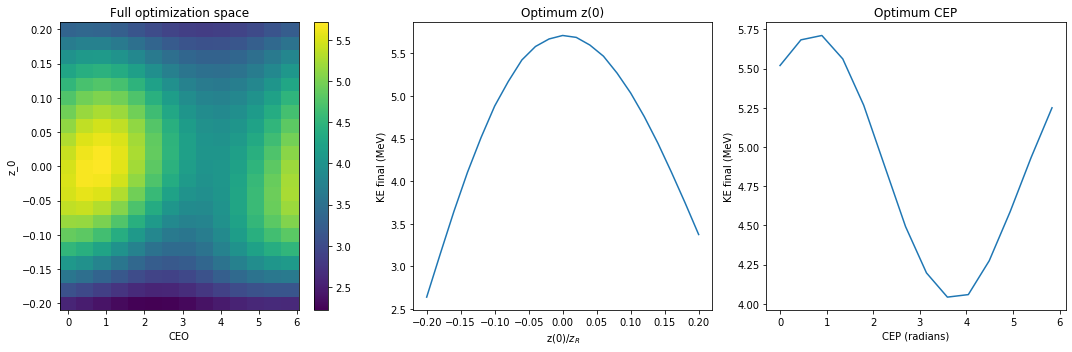

In [10]:
plt.figure(figsize=(15, 5))

ax1=plt.subplot(1, 3, 1)
(KE_final/1e6).plot()
ax1.set_title('Full optimization space')
ax2=plt.subplot(1, 3, 2)
plt.plot(z_0/z_R, np.max(KE_final, 1)/1e6)
plt.xlabel('z(0)/$z_R$')
plt.ylabel('KE final (MeV)')
ax2.set_title('Optimum z(0)')
ax3=plt.subplot(1, 3, 3)
plt.plot(Psi_0, np.max(KE_final, 0)/1e6)
plt.xlabel('CEP (radians)')
plt.ylabel('KE final (MeV)')
ax3.set_title('Optimum CEP')

plt.tight_layout()

print(np.max(np.max(KE_final)))